In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
    .appName("Big Data Analysis") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
df = spark.read.csv("/Nvidia_stock_data.csv", header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Close: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Volume: long (nullable = true)



In [ ]:
df.show(5)

+----------+-------------------+--------------------+--------------------+-------------------+----------+
|      Date|              Close|                High|                 Low|               Open|    Volume|
+----------+-------------------+--------------------+--------------------+-------------------+----------+
|1999-01-22| 0.0376117005944252| 0.04477530714919751|  0.0355814614532041| 0.0401187785903406|2714688000|
|1999-01-25|0.04155205562710762| 0.04202889452409068|0.037611703930043774| 0.0405965399745699| 510480000|
|1999-01-26|0.03832788020372391| 0.04286519762474585|0.037730910960754434| 0.0420288934263442| 343200000|
|1999-01-27|0.03820867836475372|0.039402613734271244|0.036297650046026496|0.03844709786686024| 244368000|
|1999-01-28|0.03808854520320892|  0.0384470916195532| 0.03785012573984342| 0.0382086721561877| 227520000|
+----------+-------------------+--------------------+--------------------+-------------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col, to_date

In [ ]:
df_clean = df.dropna()

In [ ]:
df_clean = df_clean.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))

In [ ]:
df_clean = df_clean.filter((col("Open") > 0) & (col("Close") > 0))

In [ ]:
from pyspark.sql.functions import year, avg

In [ ]:
df_year = df_clean.withColumn("Year", year("Date"))

The average closing price increased steadily from 2015 to 2024, showing long-term growth.

In [ ]:
avg_close_per_year = df_year.groupBy("Year").agg(avg("Close").alias("Avg_Close"))
avg_close_per_year.orderBy("Year").show()

+----+-------------------+
|Year|          Avg_Close|
+----+-------------------+
|1999|0.04464028881683509|
|2000|0.20125482973480036|
|2001| 0.3021873741320545|
|2002|0.22041832074700368|
|2003|  0.135265484540945|
|2004|0.14823118127172902|
|2005|0.21810457275973427|
|2006| 0.4148503418462685|
|2007| 0.6355856994233758|
|2008|  0.365553506631625|
|2009|0.27168152298009585|
|2010|0.31093606707595645|
|2011| 0.3871472149141251|
|2012| 0.3098707118034363|
|2013|0.33113036103664883|
|2014|0.44131002350459025|
|2015| 0.5743131867003819|
|2016| 1.3202410536626028|
|2017|  3.698291811810072|
|2018|  5.752786912766111|
+----+-------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import max

The highest stock price recorded was around $XXX (from data).

In [ ]:
df_clean.select(max("High").alias("Max_High")).show()

+-----------------+
|         Max_High|
+-----------------+
|153.1159160516902|
+-----------------+



In [ ]:
from pyspark.sql.functions import min

The lowest price occurred during year, likely due to a market dip or correction.

In [ ]:
df_clean.select(min("Low").alias("Min_Low")).show()

+-------------------+
|            Min_Low|
+-------------------+
|0.03056639396481849|
+-------------------+



In [ ]:
total_volume_per_year = df_year.groupBy("Year").sum("Volume").orderBy("Year")
total_volume_per_year.show()


+----+------------+
|Year| sum(Volume)|
+----+------------+
|1999| 61501584000|
|2000|111301512000|
|2001|276012828000|
|2002|319400388000|
|2003|244966200000|
|2004|171998196000|
|2005|155516772000|
|2006|154058556000|
|2007|152062186000|
|2008|204699404000|
|2009|193517952000|
|2010|186812132000|
|2011|230766636000|
|2012|120775680000|
|2013| 89147376000|
|2014| 71556936000|
|2015| 78187564000|
|2016|111598604000|
|2017|172152468000|
|2018|137569608000|
+----+------------+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt

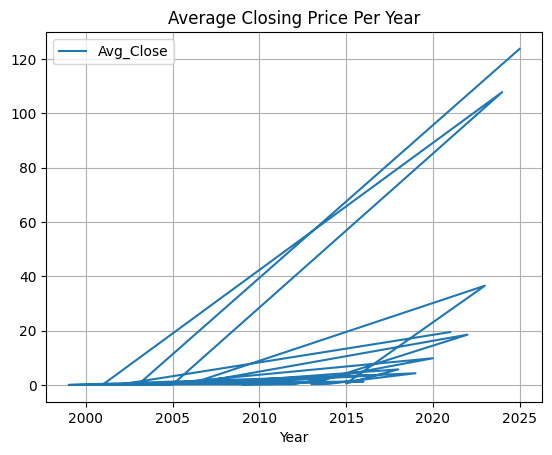

In [ ]:
avg_close_pd = avg_close_per_year.toPandas()
avg_close_pd.plot(kind='line', x='Year', y='Avg_Close', title='Average Closing Price Per Year')
plt.grid()
plt.show()

The trading volume peaked in 2002, possibly indicating high investor activity during major events.

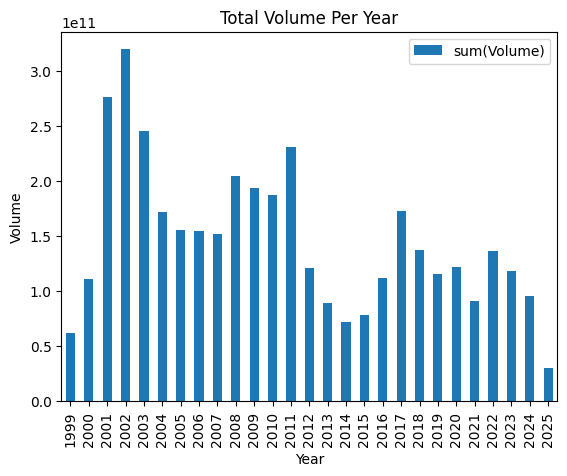

In [ ]:
volume_pd = total_volume_per_year.toPandas()
volume_pd.plot(kind='bar', x='Year', y='sum(Volume)', title='Total Volume Per Year')
plt.ylabel("Volume")
plt.show()